In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge # Regressão com regularização (evita overfitting)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# CARREGANDO OS DADOS SALVOS NO NOTEBOOK 02
dados = joblib.load('../01_Base_Dados/dados_finalizados.pkl')

X_train, X_test = dados['X_train'], dados['X_test']
y_train, y_test = dados['y_train'], dados['y_test']

In [2]:
# 1. Treinamento de Modelo (Random Forest - relações não-lineares)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [3]:
# 2. Previsões (Voltando da escala Log para Dólares)
preds_log = model.predict(X_test)
y_test_usd = np.expm1(y_test)
preds_usd = np.expm1(preds_log)

In [4]:
# 3. Métricas
r2 = r2_score(y_test, preds_log)
mae = mean_absolute_error(y_test_usd, preds_usd)
rmse = np.sqrt(mean_squared_error(y_test_usd, preds_usd))

print(f"📊 Performance do Modelo:")
print(f"R² Score: {r2:.4f} (Explica {r2*100:.1f}% da variação)")
print(f"Erro Médio Absoluto (MAE): ${mae:,.2f}")

📊 Performance do Modelo:
R² Score: 0.9263 (Explica 92.6% da variação)
Erro Médio Absoluto (MAE): $14,371.66


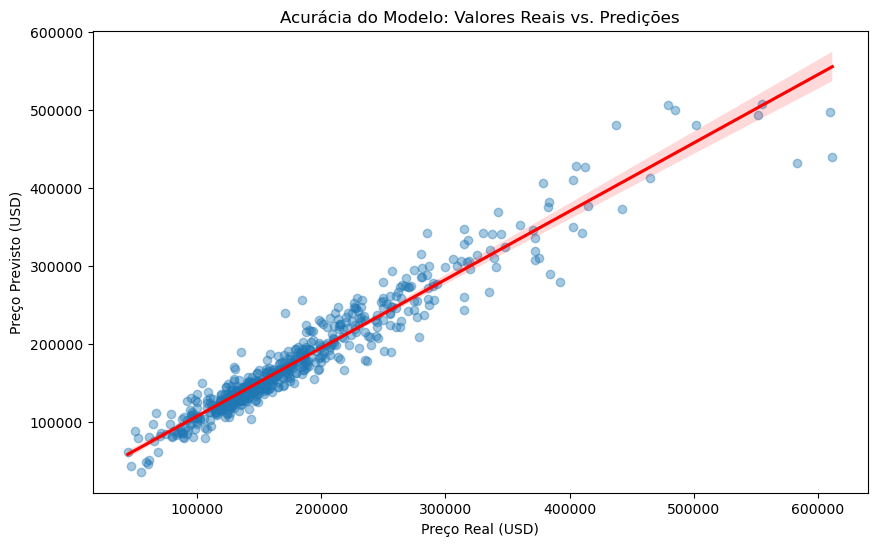

In [5]:
# 4. Visualização: Previsão vs. Real
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test_usd, y=preds_usd, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.xlabel('Preço Real (USD)')
plt.ylabel('Preço Previsto (USD)')
plt.title('Acurácia do Modelo: Valores Reais vs. Predições')
plt.show()

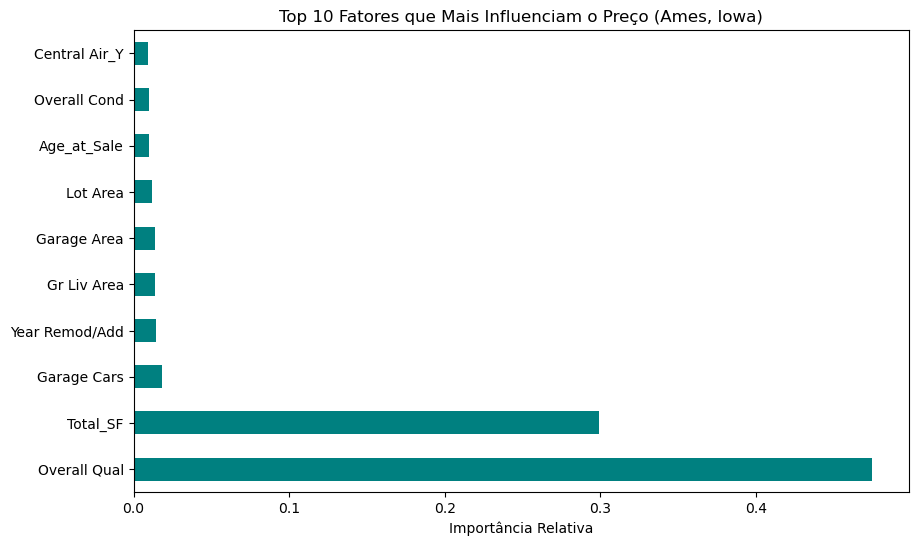

['../03_Modelos_Salvos/modelo_final.pkl']

In [6]:
# 5. Análise de Importância das Variáveis: O que mais valoriza a casa
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=dados['features'])
plt.figure(figsize=(10, 6))
feat_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title('Top 10 Fatores que Mais Influenciam o Preço (Ames, Iowa)')
plt.xlabel('Importância Relativa')
plt.show()

# 6. Salvar Modelo Final
joblib.dump(model, '../03_Modelos_Salvos/modelo_final.pkl')